<a href="https://colab.research.google.com/github/prashankkadam/Genetic-Algorithms/blob/Shortest_Routing_Path/ShortestRoutingPath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

This class allows us to handle our cities:

In [0]:
class City:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    
  def distance(self, city):
    xDis = abs(self.x - city.x)
    yDis = abs(self.y - city.y)
    distance = np.sqrt((xDis ** 2) + (yDis ** 2))
    return distance 
  
  def __repr__(self):
    return "(" + str(self.x) + "," + str(self.y) + ")"
    

This class allows us to treat the fitness as the inverse of the route distance

In [0]:
class Fitness:
  def __init__(self, route):
    self.route = route 
    self.distance = 0
    self.fitness = 0.0
    
  def routeDistance(self):
    if self.distance == 0:
      pathDistance = 0
      for i in range(0, len(self.route)):
        fromCity = self.route[i]
        toCity = None
        if i+1 < len(self.route):
          toCity = self.route[i+1]
        else:
          toCity = self.route[0]
        pathDistance += fromCity.distance(toCity)
      self.distance  = pathDistance
    return self.distance
  
  def routeFitness(self):
    if self.fitness == 0:
      self.fitness = 1 / float(self.routeDistance())
    return self.fitness   
      
     

## **Now we start creating the population:**

The following method produces individuals:

In [0]:
def createRoute(cityList):
  route = random.sample(cityList, len(cityList))
  return route

This method creates a loop which in turn creates our whole population

In [0]:
def initialPopulation(popSize, cityList):
  population = []
  
  for i in range(0, popSize):
    population.append(createRoute(cityList))
  return population

Determining the fitness of the model

In [0]:
def rankRoutes(population):
  fitnessResults = {}
  
  for i in range(0, len(population)):
    fitnessResults[i] = Fitness(population[i]).routeFitness()
  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse=True)

Selecting the mating pool

In [0]:
def selection(popRanked, eliteSize):
  selectionResults = []
  
  df = pd.DataFrame(np.array(popRanked), columns=["Index", "Fitness"])
  df['cum_sum'] = df.Fitness.cumsum()
  df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()
  
  for i in range(0, eliteSize):
    selectionResults.append(popRanked[i][0])
  for i in range(0, len(popRanked) - eliteSize):
    pick = 100 * random.random()
    
    for i in range(0, len(popRanked)):
      if pick <= df.iat[i, 3]:
        selectionResults.append(popRanked[i][0])
        break
  return selectionResults

In [0]:
def matingPool(population, selectionResults):
  matingpool = []
  
  for i in range(0, len(selectionResults)):
    index = selectionResults[i]
    matingpool.append(population[index])
  return matingpool

## **Now we do the crossover**

The following method does it for a single chromosome

In [0]:
def breed(parent1, parent2):
  child = []
  childP1 = []
  childP2 = []
  
  geneA = int(random.random() * len(parent1))
  geneB = int(random.random() * len(parent1))
  
  startGene = min(geneA, geneB)
  endGene = max(geneA, geneB)
  
  for i in range(startGene, endGene):
    childP1.append(parent1[i])
    
  childP2 = [item for item in parent2 if item not in childP1]
  
  child = childP1 + childP2
  
  return child

Now we do the crossover for the whole population:

In [0]:
def breedPopulation(matingpool, eliteSize):
  children = []
  length = len(matingpool) - eliteSize
  pool = random.sample(matingpool, len(matingpool))
  
  for i in range(0, eliteSize):
    children.append(matingpool[i])
    
  for i in range(0, length):
    child =  breed(pool[i], pool[len(matingpool)-i-1])
    children.append(child)
    
  return children

## **Mutate**

The following method does it for a single chromosome

In [0]:
def mutate(individual, mutationRate):
  for swapped in range(len(individual)):
    if(random.random() < mutationRate):
      swapWith = int(random.random() * len(individual))
      
      city1 = individual[swapped]
      city2 = individual[swapped]
      
      individual[swapped] = city2
      individual[swapped] = city1
  return individual

Now we mutate the whole population by calling the mutate function in a loop

In [0]:
def mutatePopulation(population, mutationRate):
  mutatedPop = []
  
  for ind in range(0, len(population)):
    mutatedInd = mutate(population[ind], mutationRate)
    mutatedPop.append(mutatedInd)
  return mutatedPop

Now we write the code to repeat this process for the upcoming generations

In [0]:
def nextGeneration(currentGen, eliteSize, mutationRate):
  popRanked = rankRoutes(currentGen)
  selectionResults = selection(popRanked, eliteSize)
  matingpool = matingPool(currentGen, selectionResults)
  children = breedPopulation(matingpool, eliteSize)
  nextGeneration = mutatePopulation(children, mutationRate)
  return nextGeneration

Finally we make the function where we can bring all the above functions together and pass all the required parameters:

In [0]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
  pop = initialPopulation(popSize, population)
  print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
  
  for i in range(0, generations):
    pop = nextGeneration(pop, eliteSize, mutationRate)
    
  print("Final Distance: " + str( 1 / rankRoutes(pop)[0][1]))
  bestRouteIndex = rankRoutes(pop)[0][0]
  bestRoute = pop[bestRouteIndex]
  return bestRoute

## **Running the genetic algorithm:**

Creating the population:

In [0]:
cityList = []
for i in range(0, 25):
  cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

Running the main function after setting all the parameters

In [28]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 2163.009898564013
Final Distance946.2604545593674


[(177,44),
 (183,97),
 (175,110),
 (181,136),
 (127,186),
 (199,160),
 (191,132),
 (145,112),
 (126,100),
 (89,89),
 (63,142),
 (40,168),
 (58,174),
 (46,155),
 (81,143),
 (53,109),
 (21,92),
 (11,106),
 (2,106),
 (18,80),
 (42,19),
 (91,59),
 (125,35),
 (154,28),
 (171,15)]

## **Plotting the results:**

This would help us get a better understanding of how our result converges to a single value

In [0]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
  pop = initialPopulation(popSize, population)
  progress = []
  
  progress.append(1 / rankRoutes(pop)[0][1])
  
  for i in range(0, generations):
    pop = nextGeneration(pop, eliteSize, mutationRate)
    progress.append(1 / rankRoutes(pop)[0][1])
    
  plt.plot(progress)
  plt.ylabel('Distance')
  plt.xlabel('Generation')
  plt.show()

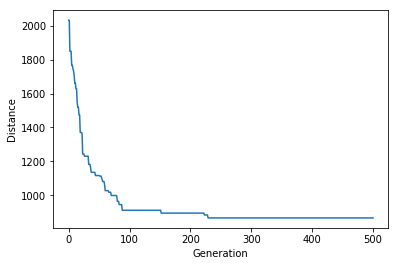

In [31]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)